In [1]:
import os
import uproot as ur
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitstring import BitArray

Load Data from ROOT Files

In [2]:
paths = []

for (path, dirnames, filenames) in os.walk('/home/dmisra/eic/zdc_neutron_samples/'):
    paths.extend(os.path.join(path, name) for name in filenames)

In [3]:
samples = {}

for path in paths:
    with ur.open(path) as file:
       tree = file["events"]
       samples[os.path.basename(f'{path}')] = tree.arrays()

Helper Functions

In [4]:
def bitExtract(n, k, p):  
    return (((1 << k) - 1)  &  (n >> p))

#Extract signed integer from bitstring
def signedint(xbits):
    x_int = []
    x_bin = np.vectorize(np.binary_repr, otypes=[str])(xbits, width=12)
    for bits in x_bin:
            x_int.append(BitArray(bin=bits).int)
    return np.array(x_int)

In [5]:
def get_labels(data, count):
    energy_labels = []
    for i in range(count):
        label = np.sqrt(data["MCParticles.momentum.x"][0,0]**2 + data["MCParticles.momentum.y"][0,0]**2 + data["MCParticles.momentum.z"][0,0]**2)
        energy_labels.append(label)
    
    return energy_labels

In [6]:
def get_layerIDs(data, branch, events):
    layerID = []
    for i in range(events):
        event_cellID = np.array(data[f"{branch}.cellID"][i])
        event_layerID = bitExtract(event_cellID, 6, 8)
        layerID.append(event_layerID)
    return layerID

In [7]:
def get_eDep(data, branch, events):
    hitsEnergy = []
    for i in range(events):
        event_hitsEnergy = np.array(data[f"{branch}.energy"][i])
        hitsEnergy.append(event_hitsEnergy)
    return hitsEnergy

In [8]:
def get_xIDs(data, branch, events):
    xID = []
    for i in range(events):
        event_cellID = np.array(data[f"{branch}.cellID"][i])
        event_xID = signedint(bitExtract(event_cellID, 12, 24))
        xID.append(event_xID)
    return xID

In [9]:
def get_xIDs_WSi(data, branch, events):
    xID = []
    for i in range(events):
        event_cellID = np.array(data[f"{branch}.cellID"][i])
        event_layerID = bitExtract(event_cellID, 6, 8)
        event_xID = signedint(bitExtract(event_cellID, 12, 24))
        for i in range(len(event_cellID)):
            if event_layerID[i] in [1, 12, 23]:
                event_xID[i] = 0.3 * event_xID[i]
        xID.append(event_xID)
    return xID

In [10]:
def get_yIDs(data, branch, events):
    yID = []
    for i in range(events):
        event_cellID = np.array(data[f"{branch}.cellID"][i])
        event_yID = signedint(bitExtract(event_cellID, 12, 36))
        yID.append(event_yID)
    return yID

In [11]:
def get_yIDs_WSi(data, branch, events):
    yID = []
    for i in range(events):
        event_cellID = np.array(data[f"{branch}.cellID"][i])
        event_layerID = bitExtract(event_cellID, 6, 8)
        event_yID = signedint(bitExtract(event_cellID, 12, 36))
        for i in range(len(event_cellID)):
            if event_layerID[i] in [1, 12, 23]:
                event_yID[i] = 0.3 * event_yID[i]
        yID.append(event_yID)
    return yID

Get Features and Labels

In [12]:
nevents = 40

In [13]:
hitEnergyDep = dict()
xIDs = dict()
yIDs = dict()
layerIDs = dict()

In [14]:
hitEnergyDep['10GeV'] = get_eDep(samples["zdc_neutron_10GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
xIDs['10GeV'] = get_xIDs(samples["zdc_neutron_10GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
yIDs['10GeV'] = get_yIDs(samples["zdc_neutron_10GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
layerIDs['10GeV'] = get_layerIDs(samples["zdc_neutron_10GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)

In [15]:
hitEnergyDep['20GeV'] = get_eDep(samples["zdc_neutron_20GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
xIDs['20GeV'] = get_xIDs(samples["zdc_neutron_20GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
yIDs['20GeV'] = get_yIDs(samples["zdc_neutron_20GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
layerIDs['20GeV'] = get_layerIDs(samples["zdc_neutron_20GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)

In [16]:
hitEnergyDep['50GeV'] = get_eDep(samples["zdc_neutron_50GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
xIDs['50GeV'] = get_xIDs(samples["zdc_neutron_50GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
yIDs['50GeV'] = get_yIDs(samples["zdc_neutron_50GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
layerIDs['50GeV'] = get_layerIDs(samples["zdc_neutron_50GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)

In [17]:
hitEnergyDep['100GeV'] = get_eDep(samples["zdc_neutron_100GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
xIDs['100GeV'] = get_xIDs(samples["zdc_neutron_100GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
yIDs['100GeV'] = get_yIDs(samples["zdc_neutron_100GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
layerIDs['100GeV'] = get_layerIDs(samples["zdc_neutron_100GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)

In [18]:
hitEnergyDep['150GeV'] = get_eDep(samples["zdc_neutron_150GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
xIDs['150GeV'] = get_xIDs(samples["zdc_neutron_150GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
yIDs['150GeV'] = get_yIDs(samples["zdc_neutron_150GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)
layerIDs['150GeV'] = get_layerIDs(samples["zdc_neutron_150GeV_10e4.edm4hep.root"], "ZDC_PbSi_Hits", nevents)

In [19]:
labels = [get_labels(samples[key], nevents) for key in samples]

Merge Data

In [20]:
import awkward as ak

In [21]:
hitEnergyDep_all = ak.concatenate(list(hitEnergyDep.values()), axis=0)
xIDs_all = ak.concatenate(list(xIDs.values()), axis=0)
yIDs_all = ak.concatenate(list(yIDs.values()), axis=0)
layerIDs_all = ak.concatenate(list(layerIDs.values()), axis=0)

In [22]:
data_features = [hitEnergyDep_all, xIDs_all, yIDs_all, layerIDs_all]

In [23]:
data_labels = np.concatenate(labels)

PyTorch Geometric

In [24]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from torch_geometric.data import Data, Dataset
from torch_geometric.loader import DataLoader
from torch_geometric.nn import knn_graph, GCNConv, global_add_pool

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)

In [26]:
class ZDCDataset(Dataset):
    def __init__(self, data_features, data_labels, knn_k=4):
        super(ZDCDataset, self).__init__()
        
        self.knn_k = knn_k
        
        self.energy = data_features[0]
        self.xID = data_features[1]
        self.yID = data_features[2]
        self.layerID = data_features[3]
        self.label = data_labels

    def len(self):
        return len(self.energy)

    def get(self, idx):
        
        energy = torch.tensor(self.energy[idx]).to(torch.float32)
        xID = torch.tensor(self.xID[idx]).to(torch.float32)
        yID = torch.tensor(self.yID[idx]).to(torch.float32)
        layerID = torch.tensor(self.layerID[idx]).to(torch.float32)
        
        label = torch.tensor(self.label[idx]).to(torch.float32)
        
        x = torch.stack([energy, xID, yID, layerID], axis=-1)
        
        #construct knn graph from (x, y, z) coordinates
        edge_index = knn_graph(x[:, [1,2]], k=self.knn_k)
        
        data = Data(
            x = x,
            y = label,
            edge_index = edge_index
        )
        
        return data

In [27]:
dataset = ZDCDataset(data_features, data_labels, knn_k=4)

for i in range(10):
    data = dataset.get(i)
    print(data.x.shape, data.edge_index.shape, data.y)

torch.Size([31, 4]) torch.Size([2, 124]) tensor(10.)
torch.Size([33, 4]) torch.Size([2, 132]) tensor(10.)
torch.Size([32, 4]) torch.Size([2, 128]) tensor(10.)
torch.Size([25, 4]) torch.Size([2, 100]) tensor(10.)
torch.Size([6, 4]) torch.Size([2, 24]) tensor(10.)
torch.Size([40, 4]) torch.Size([2, 160]) tensor(10.)
torch.Size([11, 4]) torch.Size([2, 44]) tensor(10.)
torch.Size([33, 4]) torch.Size([2, 132]) tensor(10.)
torch.Size([58, 4]) torch.Size([2, 232]) tensor(10.)
torch.Size([1, 4]) torch.Size([2, 0]) tensor(10.)


Text(0, 0.5, '$y$')

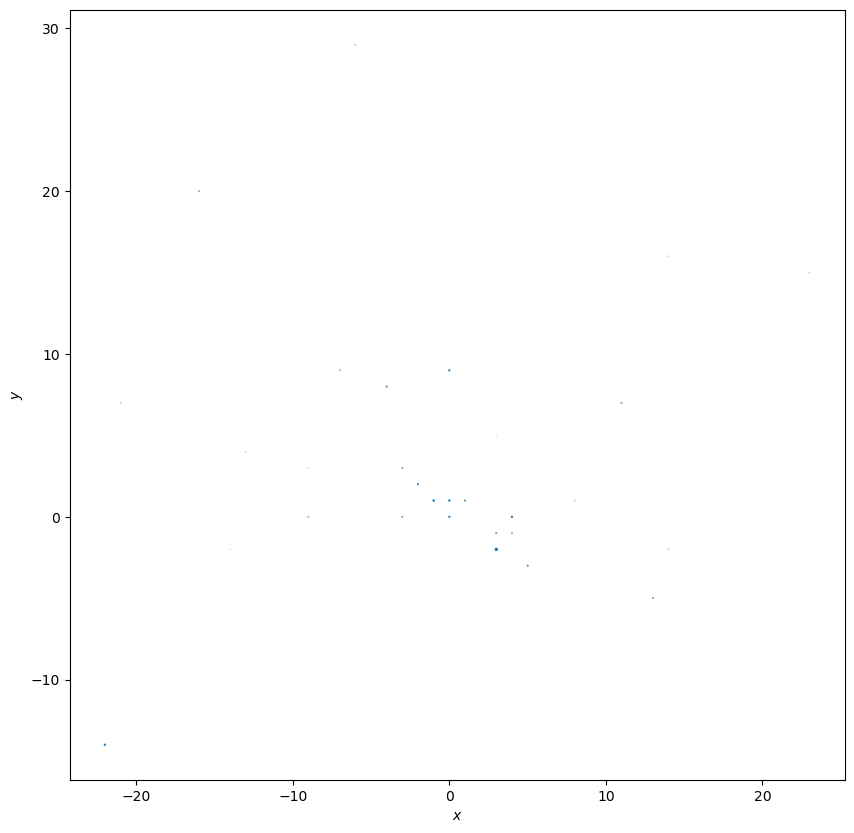

In [28]:
ievent = 10
data = dataset.get(ievent)
    
plt.figure(figsize=(10, 10))
plt.scatter(data.x[:, 1], data.x[:, 2], s=1000*data.x[:, 0]);
plt.xlabel("$x$")
plt.ylabel("$y$")

Text(0.5, 1.0, 'Graph adjacency matrix')

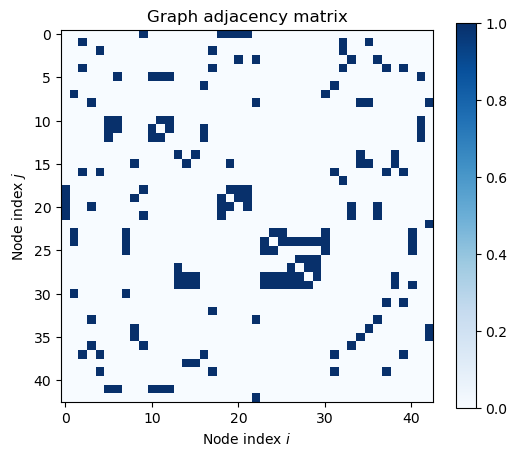

In [29]:
from torch_geometric.utils import to_dense_adj
dense_adj = to_dense_adj(data.edge_index)

plt.figure(figsize=(6,5))
plt.imshow(dense_adj[0], interpolation="none", cmap="Blues")
plt.colorbar()
plt.xlabel("Node index $i$")
plt.ylabel("Node index $j$")
plt.title("Graph adjacency matrix")

In [30]:
from torch_geometric.utils import to_networkx
import networkx as nx

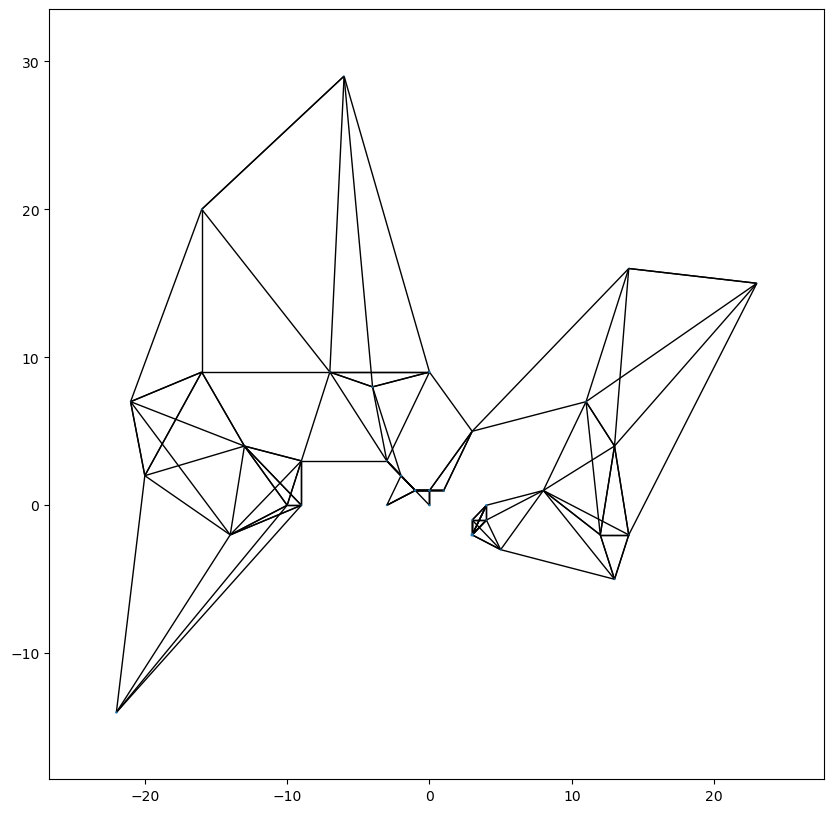

In [31]:
nxg = to_networkx(data)
pos = {i: (data.x[i, 1], data.x[i, 2]) for i in nxg.nodes}

plt.figure(figsize=(10, 10))
ax = plt.axes()
nx.draw_networkx(nxg, pos, with_labels=False, arrows=False, node_size=1000*data.x[:, 0], node_shape="o", ax=ax)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

Batching Data

In [32]:
loader = DataLoader(dataset, batch_size=10, shuffle=True)

ibatch = 0
for data_batched in loader:
    print(ibatch, data_batched.x.shape, data_batched.y)
    ibatch += 1
    if ibatch>5:
        break

0 torch.Size([2076, 4]) tensor([ 50.,  50., 150.,  20.,  10.,  50., 150.,  20.,  50.,  10.])
1 torch.Size([1276, 4]) tensor([50., 50., 50., 10., 50., 10., 20., 50., 20., 10.])
2 torch.Size([2327, 4]) tensor([ 20.,  10.,  10., 150.,  10., 150.,  20., 100.,  50., 150.])
3 torch.Size([2527, 4]) tensor([150., 150.,  20.,  50.,  20., 150.,  20.,  50., 100., 100.])
4 torch.Size([1149, 4]) tensor([ 50.,  10.,  10., 100.,  20.,  20.,  20.,  10., 100., 150.])
5 torch.Size([2228, 4]) tensor([100.,  20., 150.,  50.,  10., 100., 100.,  10.,  10., 150.])


Simple GCN Model

In [33]:
from torch_geometric.nn import GCNConv, global_add_pool

class Net(torch.nn.Module):
    def __init__(self, num_node_features=4):
        super(Net, self).__init__()
        
        #(4 -> 32)
        self.conv1 = GCNConv(num_node_features, 32)
        
        #(32 -> 1)
        self.output = torch.nn.Linear(32, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        #add a batch index, in in case we are running on a single graph
        if not hasattr(data, "batch"):
            data.batch = torch.zeros(len(x), dtype=torch.int64).to(x.device)
        
        #Transform the nodes with the graph convolution
        transformed_nodes = self.conv1(x, edge_index)
        transformed_nodes = torch.nn.functional.elu(transformed_nodes)
        
        #Sum up all the node vectors in each graph according to the batch index
        per_graph_aggregation = global_add_pool(transformed_nodes, data.batch)
        
        #For each graph,
        #predict the output based on the total vector
        #from the previous aggregation step
        output = self.output(per_graph_aggregation)
        return output

In [34]:
net = Net()

In [35]:
net(data_batched)

tensor([[-391.7583],
        [-173.8274],
        [-202.2758],
        [-345.0577],
        [  -7.1494],
        [-543.9418],
        [-401.2525],
        [   3.2704],
        [ -40.7545],
        [-554.3401]], grad_fn=<AddmmBackward0>)

In [36]:
net.state_dict().keys()

odict_keys(['conv1.bias', 'conv1.lin.weight', 'output.weight', 'output.bias'])

In [37]:
net.state_dict()["conv1.lin.weight"].shape, net.state_dict()["conv1.bias"].shape

(torch.Size([32, 4]), torch.Size([32]))

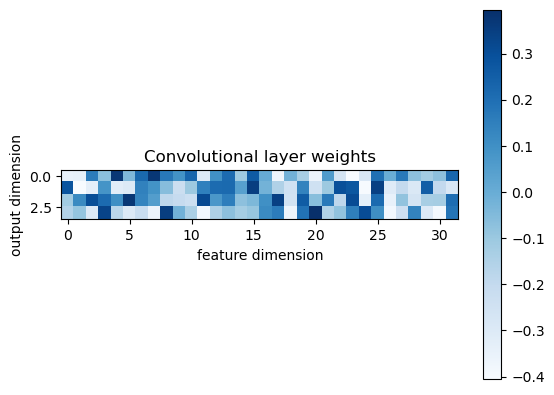

In [38]:
plt.title("Convolutional layer weights")
plt.imshow(net.state_dict()["conv1.lin.weight"].detach().numpy().T, cmap="Blues")
plt.xlabel("feature dimension")
plt.ylabel("output dimension")
plt.colorbar()

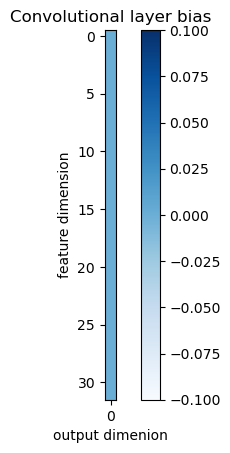

In [39]:
plt.title("Convolutional layer bias")
plt.imshow(net.state_dict()["conv1.bias"].unsqueeze(-1).detach().numpy(), cmap="Blues")
plt.xlabel("output dimenion")
plt.ylabel("feature dimension")
plt.xticks([0])
plt.colorbar()

In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Net().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

model.train()
losses_train = []

for epoch in range(20):
    
    loss_train_epoch = []
    
    for data_batch in loader:
        
        data_batch = data_batch.to(device)
        optimizer.zero_grad()
        out = model(data_batch)
        loss = nn.functional.mse_loss(out[:, 0], data_batch.y)
        loss.backward()
        loss_train_epoch.append(loss.item())
        optimizer.step()

    loss_train_epoch = np.mean(loss_train_epoch)
    losses_train.append(loss_train_epoch)
    print(epoch, loss_train_epoch)

0 27342.47103881836
1 4759.105471801758
2 2139.011343383789
3 1928.3310424804688
4 1724.753091430664
5 1491.0388320922852
6 1350.144396209717
7 1188.5630950927734
8 1072.8609313964844
9 978.0876441955567
10 913.5024406433106
11 870.3340270996093
12 820.3142356872559
13 773.7034637451172
14 740.4501159667968
15 737.8288703918457
16 720.7199508666993
17 713.711669921875
18 690.9257957458497
19 687.7023338317871


Text(0.5, 0, 'epoch')

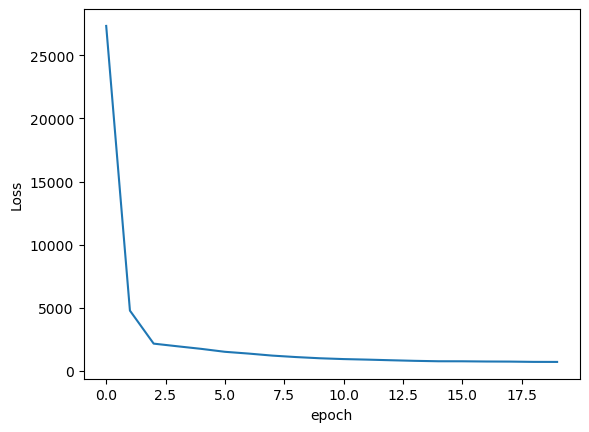

In [41]:
plt.plot(losses_train, label="training")
plt.ylabel("Loss")
plt.xlabel("epoch")

In [42]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

193

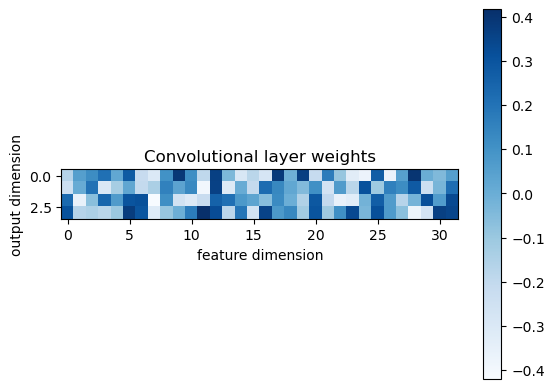

In [43]:
plt.title("Convolutional layer weights")
plt.imshow(model.state_dict()["conv1.lin.weight"].detach().cpu().numpy().T, cmap="Blues")
plt.xlabel("feature dimension")
plt.ylabel("output dimension")
plt.colorbar()

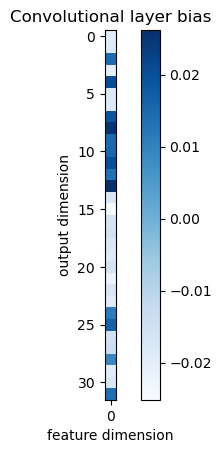

In [44]:
plt.title("Convolutional layer bias")
plt.imshow(model.conv1.state_dict()["bias"].unsqueeze(-1).detach().cpu().numpy(), cmap="Blues")
plt.xlabel("feature dimension")
plt.ylabel("output dimension")
plt.xticks([0])
plt.colorbar()

In [45]:
data = dataset.get(ievent).to(device)
embedded_nodes = model.conv1(data.x, data.edge_index)

In [46]:
data.x.shape, embedded_nodes.shape

(torch.Size([43, 4]), torch.Size([43, 32]))

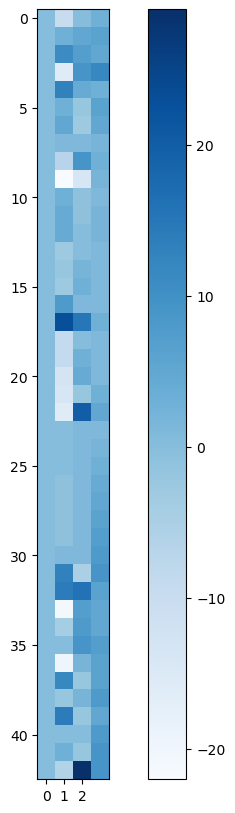

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(data.x.cpu().numpy(), interpolation="none", cmap="Blues")
plt.colorbar()
plt.xticks([0,1,2]);

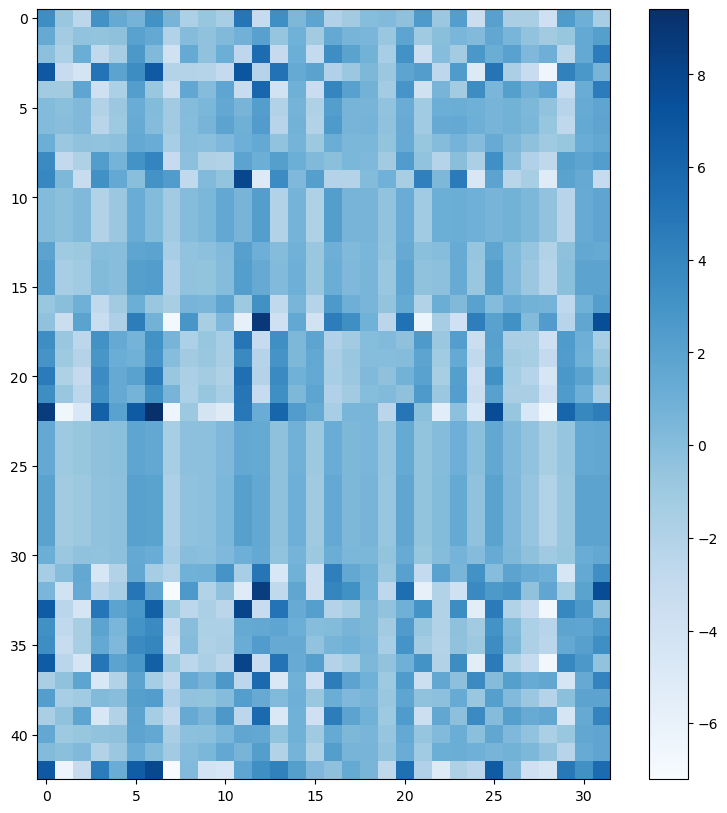

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(embedded_nodes.detach().cpu().numpy(), interpolation="none", cmap="Blues")
plt.colorbar()

In [49]:
model_cpu = model.to('cpu')

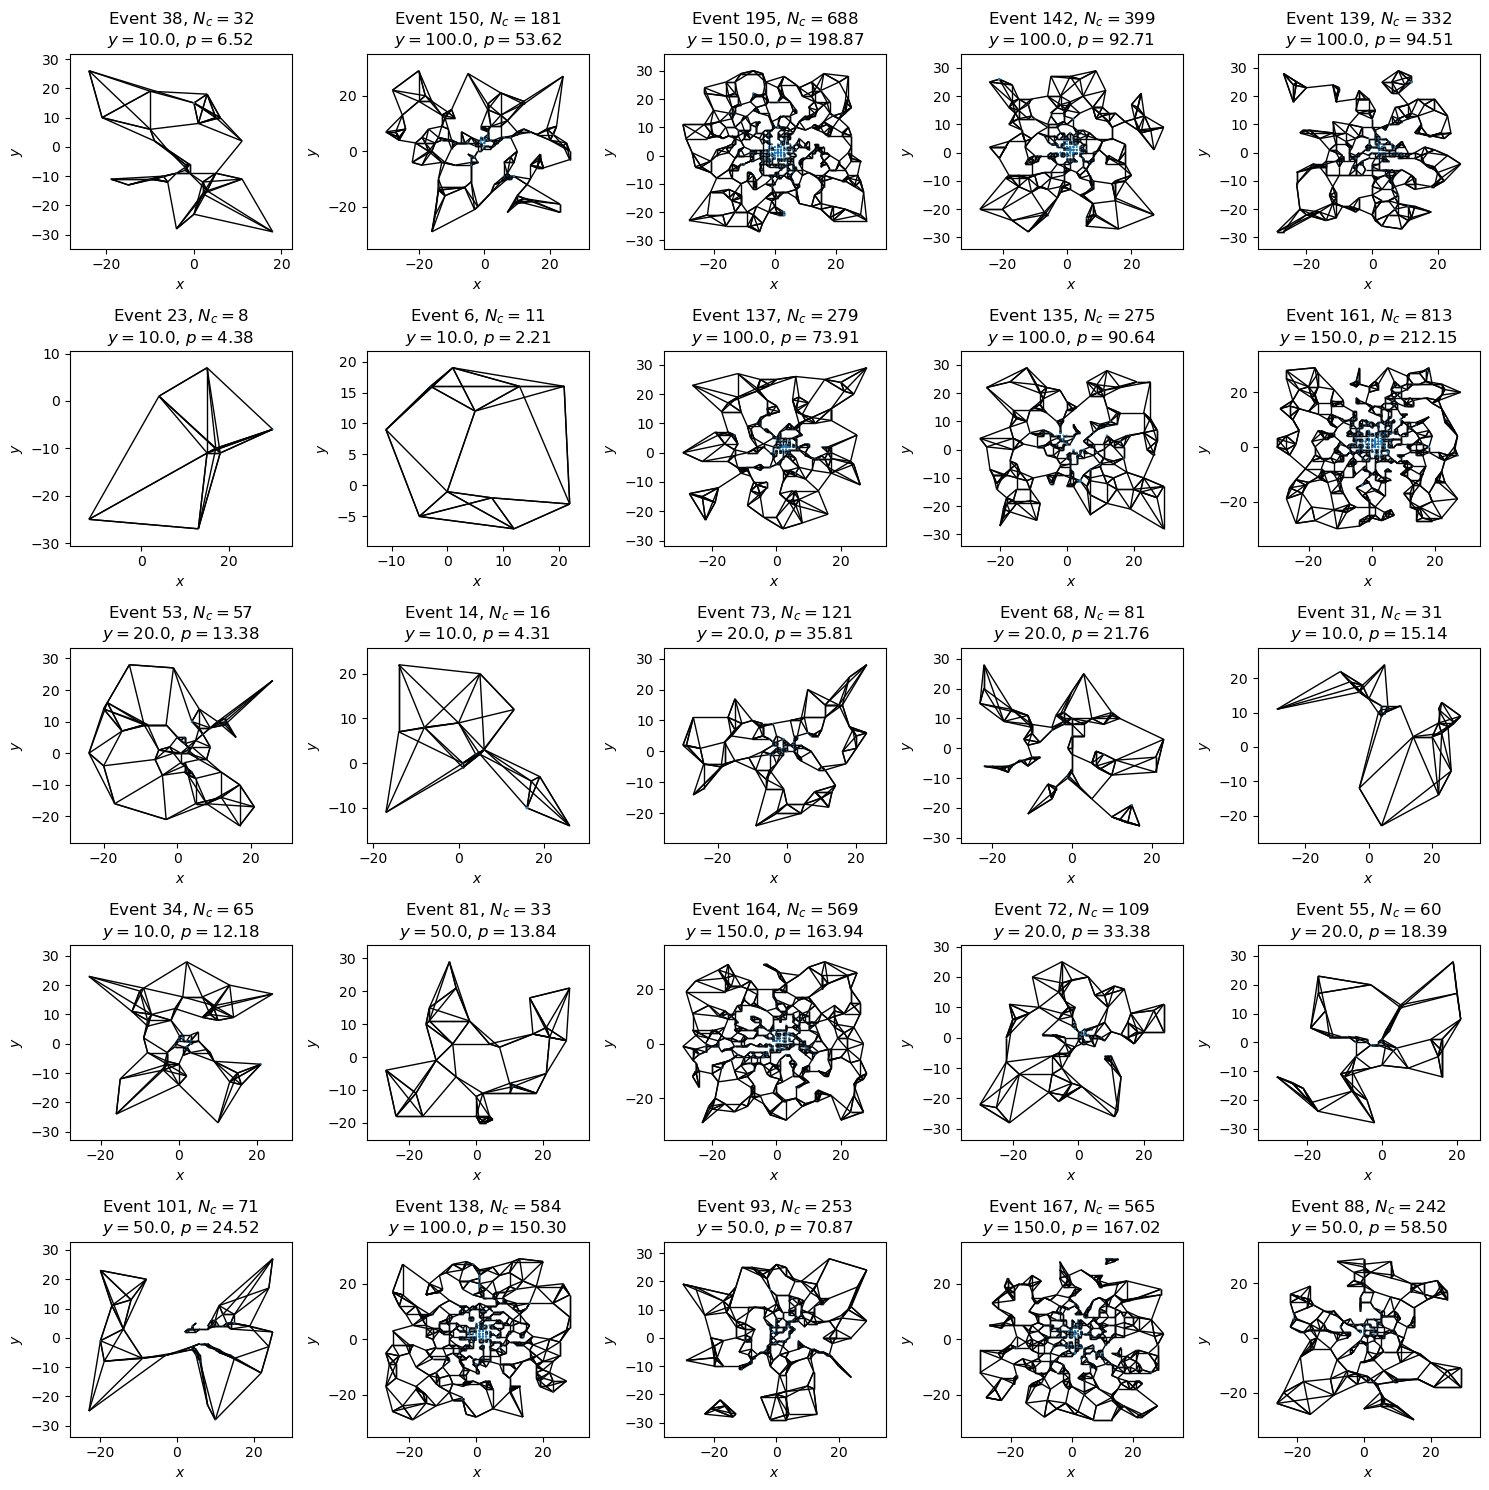

In [50]:
random_indices = np.random.permutation(len(xIDs_all))
plt.figure(figsize=(15,15))
for iplt in range(1,26):
    iptcl = random_indices[iplt]
    ax = plt.subplot(5,5,iplt)
    data = dataset.get(iptcl)
    
    pred = model_cpu(data).detach()[0,0].item()
    
    color = "blue"
    if data.y == 1:
        color = "red"
    
    nxg = to_networkx(data)
    pos = {i: (data.x[i, 1], data.x[i, 2]) for i in nxg.nodes}

    nx.draw_networkx(
        nxg, pos,
        with_labels=False,
        arrows=False,
        node_size=100*data.x[:, 0],
        node_shape="o",
        ax=ax
    )
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title("Event {}, $N_c={}$\n$y={}$, $p={:.2f}$".format(iptcl, len(xIDs_all[iptcl]), data_labels[iptcl].astype('float32'), pred))
plt.tight_layout()

Predictions

In [ ]:
from scipy.stats import norm
from scipy.optimize import curve_fit

In [146]:
#Set the model in evaluation mode
model.eval()

#Setup the inference mode context manager
with torch.inference_mode():
  y_preds = model()

plt.hist(y_preds[:,0].numpy(),100,histtype='step')
plt.xlabel('Energy (GeV)')
plt.ylabel('Count')
plt.title('Predicted Energy Distribution')

TypeError: list indices must be integers or slices, not tuple

In [ ]:
#Set the model in evaluation mode
model_1.eval()

#Setup the inference mode context manager
with torch.inference_mode():
  y_preds_200GeV = model_1(features_200GeV)
  y_preds_100GeV = model_1(features_100GeV)
  y_preds_50GeV = model_1(features_50GeV)
  y_preds_10GeV = model_1(features_10GeV)

In [ ]:
peak_preds = norm.fit(y_preds_10GeV)[0], norm.fit(y_preds_50GeV)[0], norm.fit(y_preds_100GeV)[0], norm.fit(y_preds_200GeV)[0]
true_peaks = [10,50,100,200]
peak_preds

In [ ]:
plt.scatter(true_peaks,peak_preds)
plt.xlabel('Particle Energy (GeV)')
plt.ylabel('Reconstructed Energy (GeV)')
plt.plot(np.arange(1,201),np.arange(1,201))
plt.title('Linearity')

In [ ]:
#Get energy resolution from distribution of predictions
def res(preds,energy):
    return norm.fit(preds)[1]/energy

energy_list = [200,100,50,10]
resolutions = res(y_preds_200GeV,200), res(y_preds_100GeV,100), res(y_preds_50GeV,50), res(y_preds_10GeV,10)

In [ ]:
#Curve fit for energy resolution as a function of energy
def f(E,a):
    return a/np.sqrt(E)

popt, pcov = curve_fit(f, energy_list, resolutions)

In [ ]:
popt, pcov

In [ ]:
plt.plot(range(200),f(range(1,201),popt[0]))
plt.scatter(energy_list,resolutions)
plt.xlabel('Energy (GeV)')
plt.ylabel('Resolution')
plt.title('Energy Resolution')

In [ ]:
torch.save(obj=model_1.state_dict(), f="/home/dmisra/eic/model_1")